<a href="https://colab.research.google.com/github/PDavila168/CNN/blob/main/Proyecto_2_IntencionCompra2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Conjunto de datos de intención de compra de compradores en línea

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from keras.optimizers import Adam

In [66]:
import matplotlib.pyplot as plt
import plotly.express as px

In [67]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [68]:
!pip install missingno
import missingno
!pip install upsetplot pyjanitor==0.23.1
import upsetplot
import janitor
import scipy.stats

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 3.7 MB/s eta 0:00:00
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=98ebae2a657c46240c53c05baed921e057f8bee524b679743f9abc7b6b7896d1
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [1]:
!pip install tensorflow
!pip install visualkerasimport visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix , classification_report

ERROR: Could not find a version that satisfies the requirement visualkerasimport (from versions: none)
ERROR: No matching distribution found for visualkerasimport


1. Extracción de datos

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
import pandas as pd

# URL of the CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [6]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

##2. Exploración y limpieza de datos

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  12330 non-null  bool 
dtypes: bool(1)
memory usage: 12.2 KB


In [9]:
X.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  
0        1       1            1  Returning_Visitor    False  
1        2       1            2  Returning_Visitor    False  
2        1       9            3  Returning_Visitor    False  
3        2       2            4  Returning_Visitor    False  
4        3       1            4  Returning_Visitor     True

Bounce Rate (Porcentaje de rebote): para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego lo abandonan ("rebota") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.

Exit Rate (Tasa de salida): para una página web específica se calcula como el porcentaje de todas las páginas vistas a la página que fueron las últimas en la sesión.

Page Value (Valor de página): representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico.

Special Day (Día especial): indica la cercanía del tiempo de visita al sitio a un día especial específico (por ejemplo, Día de la Madre, Día de San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de Valentina, este valor toma un valor distinto de cero entre el 2 y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

Month (Mes)

operatingsystem (Sistema operativo): Android Mobile, iOS, Windows, Linux, Solaris, Fedora

browser (navegador): Google chrome, fire fox, apple safari, Opera, etc.

region (region): China, india, estados Unidos, Indonesia, Nigeria, etc.

traffic type (tipo de tráfico):

visitor type (tipo de visitante): como visitante nuevo o recurrente

wekkend (fin de semana): un valor booleano que indica si la fecha de la visita es fin de semana

In [10]:
y.head()

Revenue
0    False
1    False
2    False
3    False
4    False

In [11]:
y.value_counts()

Revenue
False      10422
True        1908
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

125

In [13]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [15]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12205.0     2.338878     3.330436  0.0    0.000000   
Administrative_Duration  12205.0    81.646331   177.491845  0.0    0.000000   
Informational            12205.0     0.508726     1.275617  0.0    0.000000   
Informational_Duration   12205.0    34.825454   141.424807  0.0    0.000000   
ProductRelated           12205.0    32.045637    44.593649  0.0    8.000000   
ProductRelated_Duration  12205.0  1206.982457  1919.601400  0.0  193.000000   
BounceRates              12205.0     0.020370     0.045255  0.0    0.000000   
ExitRates                12205.0     0.041466     0.046163  0.0    0.014231   
PageValues               12205.0     5.949574    18.653671  0.0    0.000000   
SpecialDay               12205.0     0.061942     0.199666  0.0    0.000000   
OperatingSystems         12205.0     2.124211     0.906823  1.0    2.000000   
Browser                  12205.0     2.357804     1.710114  1.0    2.000000   
Region                   12205.0     3.153298     2.402340  1.0    1.000000   
TrafficType              12205.0     4.073904     4.016654  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    9.000000    94.700000   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  608.942857  1477.154762  63973.522230  
BounceRates                0.002899     0.016667      0.200000  
ExitRates                  0.025000     0.048529      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

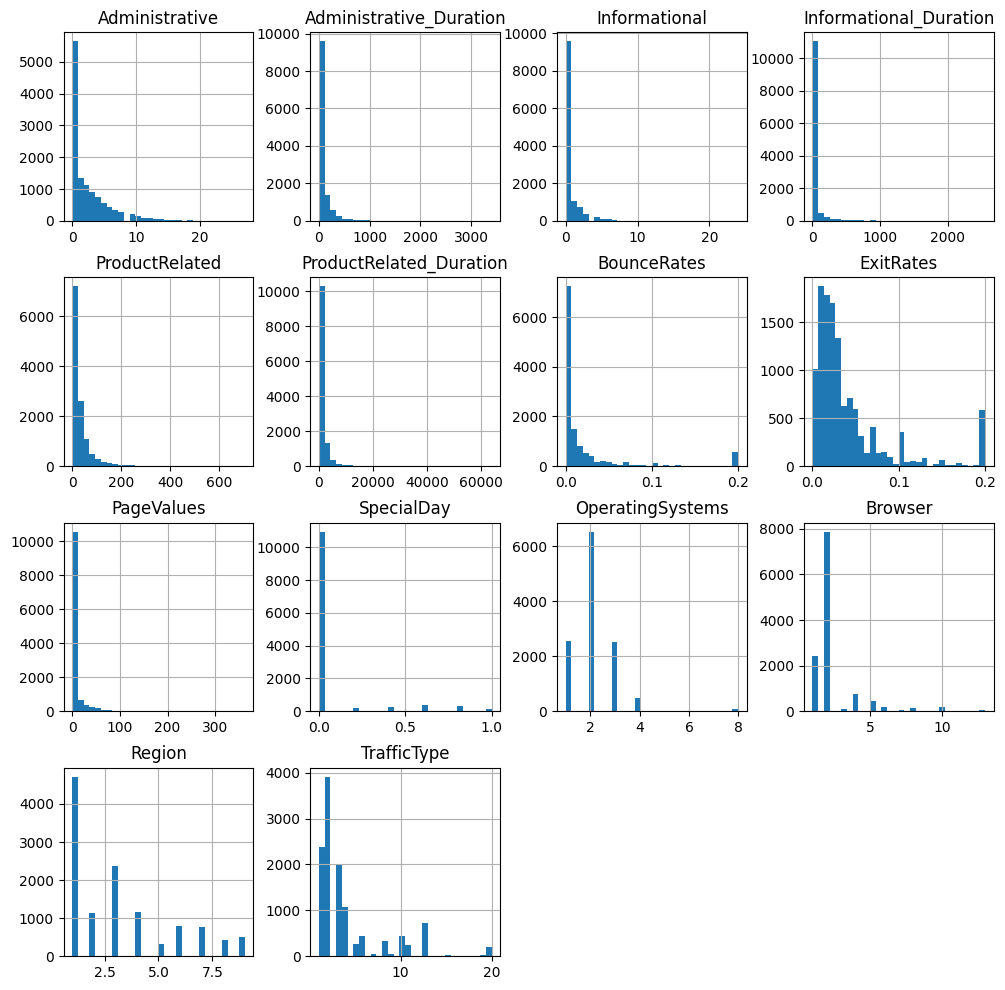

In [16]:
df.hist(bins=30, figsize=(12, 12), xlabelsize='10', ylabelsize='10')

In [17]:
df["Revenue"].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

In [21]:
fig = px.box(df, y=["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "BounceRates", 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType' ],
             title="Boxplot de variables en la base de datos")
fig.show()

In [ ]:
# Análisis Estadístico
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
Q1 = df["Administrative_Duration"].quantile(0.25)
Q3 = df["Administrative_Duration"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(f'el valor lower para el filtro es: {lower}')
print(f'el valor lower para el filtro es: {upper}')

In [ ]:
df = df[(df["Administrative_Duration"] >= lower) & (df["Administrative_Duration"] <= upper)]

In [ ]:
Q1 = df["Informational_Duration"].quantile(0.25)
Q3 = df["Informational_Duration"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(f'el valor lower para el filtro es: {lower}')
print(f'el valor lower para el filtro es: {upper}')

In [ ]:
df = df[(df["Informational_Duration"] >= lower) & (df["Informational_Duration"] <= upper)]

In [ ]:
df.info() # Validamos los valores Outliers eliminados

Ahora revisaremos nuevamente el boxplot de nuestros datos

In [22]:
fig = px.box(df, y=["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "BounceRates", 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType' ],
             title="Boxplot de variables en la base de datos")
fig.show()

In [23]:
df.describe().T

count         mean          std  min         25%  \
Administrative           12205.0     2.338878     3.330436  0.0    0.000000   
Administrative_Duration  12205.0    81.646331   177.491845  0.0    0.000000   
Informational            12205.0     0.508726     1.275617  0.0    0.000000   
Informational_Duration   12205.0    34.825454   141.424807  0.0    0.000000   
ProductRelated           12205.0    32.045637    44.593649  0.0    8.000000   
ProductRelated_Duration  12205.0  1206.982457  1919.601400  0.0  193.000000   
BounceRates              12205.0     0.020370     0.045255  0.0    0.000000   
ExitRates                12205.0     0.041466     0.046163  0.0    0.014231   
PageValues               12205.0     5.949574    18.653671  0.0    0.000000   
SpecialDay               12205.0     0.061942     0.199666  0.0    0.000000   
OperatingSystems         12205.0     2.124211     0.906823  1.0    2.000000   
Browser                  12205.0     2.357804     1.710114  1.0    2.000000   
Region                   12205.0     3.153298     2.402340  1.0    1.000000   
TrafficType              12205.0     4.073904     4.016654  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    9.000000    94.700000   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  608.942857  1477.154762  63973.522230  
BounceRates                0.002899     0.016667      0.200000  
ExitRates                  0.025000     0.048529      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

##02. Preprocesamiento de datos

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
label_name = "Revenue"

In [46]:
escalables = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
nominales = ['Weekend']

In [48]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [49]:
standard_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder()

In [51]:
imputer_numericos = SimpleImputer(strategy="mean")
imputer_nominales = SimpleImputer(strategy="most_frequent")

In [52]:
col_transformer = make_column_transformer((make_pipeline(standard_scaler, imputer_numericos), escalables),
                                          (make_pipeline(one_hot_encoder, imputer_nominales), nominales),
                                          remainder = 'passthrough')

In [53]:
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 (['Administrative', 'Administrative_Duration',
                                   'Informational', 'Informational_Duration',
                                   'ProductRelated', 'ProductRelated_Duration',
                                   'BounceRates', 'ExitRates', 'PageValues',
                                   'SpecialDay', 'OperatingSystems', 'Browser',
                                   'Region', 'TrafficType',
                                   'VisitorType_New_Visitor',
                                   'VisitorType_Other',
                                   'VisitorType_Returning_Visitor'],)),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Weekend'])])

In [56]:
!pip install tensorflow
!pip install visualkeras
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix , classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 12.5 MB/s eta 0:00:00


In [57]:
X_encoded = pd.DataFrame(col_transformer.fit_transform(X),
                               columns = col_transformer.get_feature_names_out(),
                               index = X.index).rename_columns(
                                   function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
                                       function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
                                                   function = lambda x: x.removeprefix('remainder__'))
X_encoded

TypeError: unhashable type: 'list'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Sep'

##Paso 1: Definir la estructura de nuestra red

In [31]:
X_train.shape

(9247, 17)

# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada


In [32]:
input_shape = X_train.shape[1]
input_shape

17

In [33]:
model = Sequential()

In [37]:
y_train.shape

(9247, 1)

In [38]:
y_test.shape

(3083, 1)

In [39]:
X_test.shape

(3083, 17)

In [40]:
modelo1 = Sequential()
modelo1.add(Dense(17, activation='relu', input_shape=(17,), name='capa_1'))
modelo1.add(Dense(1, activation='sigmoid', name='capa_salida'))
modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 17)                306       
                                                                 
 capa_salida (Dense)         (None, 1)                 18        
                                                                 
Total params: 324 (1.27 KB)
Trainable params: 324 (1.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
modelo2 = Sequential()
modelo2.add(Dense(17, activation='relu', input_shape=(17,), name='capa_1'))
modelo2.add(Dense(5, activation='relu', name='capa_2'))
modelo2.add(Dense(1, activation='sigmoid', name='capa_salida'))
modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 17)                306       
                                                                 
 capa_2 (Dense)              (None, 5)                 90        
                                                                 
 capa_salida (Dense)         (None, 1)                 6         
                                                                 
Total params: 402 (1.57 KB)
Trainable params: 402 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
modelo3 = Sequential()
modelo3.add(Dense(17, activation='relu', input_shape=(17,), name='capa_1'))
modelo3.add(Dense(5, activation='relu', name='capa_2'))
modelo3.add(Dense(3, activation='relu', name='capa_3'))
modelo3.add(Dense(1, activation='sigmoid', name='capa_salida'))
modelo3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 17)                306       
                                                                 
 capa_2 (Dense)              (None, 5)                 90        
                                                                 
 capa_3 (Dense)              (None, 3)                 18        
                                                                 
 capa_salida (Dense)         (None, 1)                 4         
                                                                 
Total params: 418 (1.63 KB)
Trainable params: 418 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
modelo1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

modelo3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [58]:
nepochs = 70
historia1 = modelo1.fit(X_train, y_train, epochs=nepochs, validation_data=(X_test, y_test), verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

loss = historia1.history['loss']
accuracy = historia1.history['accuracy']
test_loss = historia1.history['val_loss']
test_accuracy = historia1.history['val_accuracy']
epochs = historia1.epoch

plt.subplot(121)
plt.plot(epochs, loss, label='Train Loss', color='blue', linestyle='-')
plt.plot(epochs, test_loss, label='Test Loss', color='red', linestyle='--')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Testing Loss', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)

plt.subplot(122)
plt.plot(epochs, accuracy, label='Train Accuracy', color='blue', linestyle='-')
plt.plot(epochs, test_accuracy, label='Test Accuracy', color='red', linestyle='--')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Testing Accuracy', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.ylim(0, 1)

plt.suptitle("Modelo 1", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

NameError: name 'historia1' is not defined

<Figure size 1000x500 with 0 Axes>